In [2]:
import math
from scipy.special import comb

def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) *
             error**k *
             (1-error)**(n_classifier - k)
             for k in range(k_start, n_classifier + 1)]
    return sum(probs)


print(ensemble_error(11, 0.25))
print(ensemble_error(3, 0.2))

0.03432750701904297
0.10400000000000004


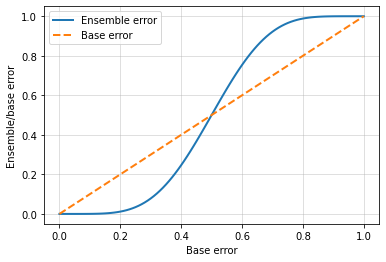

In [3]:
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ensemble_errors = [ensemble_error(11, err) for err in error_range]
plt.plot(error_range, ensemble_errors,
         label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range,
         label='Base error', linewidth=2, linestyle='--')
plt.xlabel('Base error')
plt.ylabel('Ensemble/base error')
plt.legend(loc='upper left')
plt.grid(alpha=0.5)
plt.show()

In [4]:
bin_test = np.bincount([0, 0, 1, 2, 2, 5], weights=[0.2, 0.2, 0.6, 0.3, 1, 2])
print(bin_test)
print(np.argmax(bin_test))

[0.4 0.6 1.3 0.  0.  2. ]
5


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.pipeline import _name_estimators

class MajorityVoteClassifier():
    def __init__(self, classifiers, vote='classlabel', weights=None):
        assert vote in ('classlabel', 'probability')
        assert weights and len(weights) == len(classifiers)
        self.classifiers = classifiers
        self.named_classifiers = {k: v for k, v in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        self.classifiers_ = None
        self.label_enc_ = None
    
    def fit(self, X, y):
        self.label_enc_ = LabelEncoder()
        self.label_enc_.fit(y)
        y_encoded = self.label_enc_.transform(y)
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, y_encoded)
            self.classifiers_.append(fitted_clf)

        return self
    
    def predict(self, X):
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:    # vote == 'classlabel'
            # shape: (n_samples, n_classifiers)
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T
            maj_vote = np.apply_along_axis(
                lambda x: np.argmax(np.bincount(x, weights=self.weights)),
                axis=1,
                arr=predictions
            )
            
        maj_vote = self.label_enc_.inverse_transform(maj_vote)
        return maj_vote
        
    def predict_prova(self, X):
        probas = np.asarray([clf.predict_proba(X) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba
    
    def get_params(self, deep=True):
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)

        out = self.named_classifiers.copy()
        for name, step in self.named_classifiers.items():
            for k, v in step.get_params(deep=True):
                out[f'{name}__{k}'] = v
        return out

In [32]:
my_arr = np.asarray([
    np.array([[1, 2], [3, 4]]),
    np.array([[5, 6], [7, 8]]),
])
np.average(my_arr, axis=0)

my_arr2 = np.array([
    [1, 3, 5],
    [2, 4, 6],
    [3, 5, 7]
])
print(np.average(
    my_arr2,
    axis=0
))
print(my_arr2[:, 0])
print(my_arr2[:, 1])
print(my_arr2[:, 2])
print()
print(np.average(
    my_arr2,
    axis=1
))
print(my_arr2[0, :])
print(my_arr2[1, :])
print(my_arr2[2, :])

[2. 4. 6.]
[1 2 3]
[3 4 5]
[5 6 7]

[3. 4. 5.]
[1 3 5]
[2 4 6]
[3 5 7]


In [49]:
my_arr3 = np.array([
    [[1, 3, 5],
     [2, 4, 6],
     [3, 5, 7]],
    
    [[10, 12, 14],
     [11, 13, 15],
     [12, 14, 16]]
])

# Считает средние для каждого элемента двух матриц
print(np.average(my_arr3, axis=0))
print(my_arr3.shape)
print(np.average(my_arr3, axis=0).shape)
print(my_arr3[0][0][0])
print(my_arr3[:, 0, 1])

[[ 5.5  7.5  9.5]
 [ 6.5  8.5 10.5]
 [ 7.5  9.5 11.5]]
(2, 3, 3)
(3, 3)
1
[ 3 12]


In [54]:
# Можно указать веса
# https://numpy.org/doc/stable/reference/generated/numpy.average.html#numpy-average
np.average(np.array([2, 3]), weights=np.array([3, 1]))

2.25

In [63]:
my_arr4 = np.array(
    [[2, 1, 6, 0],
     [3, 4, 1, 5]]
)
# Ищем номера строк в которых значение колонки максимальное. Выдаем результат для каждой колонки
print(np.argmax(
    my_arr4,
    axis=0
))
# Ищем номера колонок в которых значение в строке максимальное. Выдаем результат для каждой строки
print(np.argmax(
    my_arr4,
    axis=1
))

[1 1 0 1]
[2 3]


In [66]:
print(np.asarray([
    np.array([1, 2, 3, 4]),
    np.array([5, 6, 7, 8])
]).T)

[[1 5]
 [2 6]
 [3 7]
 [4 8]]


In [68]:
np.apply_along_axis(
    lambda x: x + 1,
    axis=1,
    arr=np.array([
        [1, 2],
        [3, 4]
    ])
)

array([[2, 3],
       [4, 5]])

In [69]:
np.argmax(np.array([3, 1, 0]))

0